# -----------------------
# 1. Hamming Coding
# -----------------------

In [2]:
def hammingEncode(data):
    d = list(map(int, data))
    code = ['p1', 'p2', d[0], 'p3', d[1], d[2], d[3]]
    code[0] = code[2]^code[4]^code[6]
    code[1] = code[2]^code[5]^code[6]
    code[3] = code[4]^code[5]^code[6]
    return code

def hammingDetectCorrect(code):
    p1 = code[0]^code[2]^code[4]^code[6]
    p2 = code[1]^code[2]^code[5]^code[6]
    p3 = code[3]^code[4]^code[5]^code[6]
    error_pos = p1*1 + p2*2 + p3*4
    if error_pos != 0:
        print(f'Error detected at position: {error_pos}')
        code[error_pos - 1] ^= 1
        print('Error Corrected')
    else:
        print('No error detected')
    
    return code


### Example

In [3]:
data = '1011'
encoded = hammingEncode(data)
print(f'Original data: {data}\nEncoded Hamming: {encoded}')

Original data: 1011
Encoded Hamming: [0, 1, 1, 0, 0, 1, 1]


- Make an error

In [4]:
received = encoded.copy()
received[4] ^= 1 # flip 5th bit
print(f'With error: {received}')


With error: [0, 1, 1, 0, 1, 1, 1]


- Detect & Correct

In [5]:
corrected = hammingDetectCorrect(received)
print(f'Corrected code: {corrected}')

Error detected at position: 5
Error Corrected
Corrected code: [0, 1, 1, 0, 0, 1, 1]


### Practice ------------------

In [6]:
def hammingEncode(data):
    d = list(map(int, data))
    code = ['p1', 'p2', d[0], 'p3', d[1], d[2], d[3]]
    code[0] = code[2]^code[4]^code[6]
    code[1] = code[2]^code[5]^code[6]
    code[3] = code[4]^code[5]^code[6]
    return code

def hammingDetectCorrect(code):
    p1 = code[0]^code[2]^code[4]^code[6]
    p2 = code[1]^code[2]^code[5]^code[6]
    p3 = code[3]^code[4]^code[5]^code[6]
    
    error_pos = p1*1 + p2*2 + p3*4
    if error_pos:
        print(f'Error detect at position {error_pos}')
        code[error_pos - 1] ^= 1
        print(f'Error Corrected.')
    else:
        print('No error detected')

    return code

data = '1011'
encoded = hammingEncode(data)
print(encoded)

received = encoded.copy()
received[4] ^= 1
print(received)

correct = hammingDetectCorrect(received)
print(correct)


[0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1]
Error detect at position 5
Error Corrected.
[0, 1, 1, 0, 0, 1, 1]


# ------------------------------------------
# 2. Line Coding (NRZ, RZ, Manchester)
# ------------------------------------------

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = '10110'
bits = list(map(int, data))
bit_size = len(bits)
print(bits)

[1, 0, 1, 1, 0]


- For smooth graph

In [9]:
points = 1000

- Time vector

In [10]:
t = np.linspace(0, len(bits), len(bits)*points)

- NRZ Encoding

In [11]:
nrz = []
for bit in bits:
    if bit:
        nrz.extend([1] * points)
    else:
        nrz.extend([-1] * points)

- NRL-I

In [12]:
nrz_i = []
last_level = -1
for bit in bits:
    if bit:
        last_level *= -1
    
    nrz_i.extend([last_level] * points)

- RZ Encoding

In [13]:
rz = []
for bit in bits:
    if bit:
        rz.extend([-1]* (points//2) + [0] * (points//2))
    else:
        rz.extend([1] * (points//2) + [0] * (points//2))

- Manchester Encoding

In [14]:
manchester = []
for bit in bits:
    if bit:
        manchester.extend([1]* (points//2) + [-1] * (points//2))
    else:
        manchester.extend([-1] * (points//2) + [1] * (points//2))

- Plot

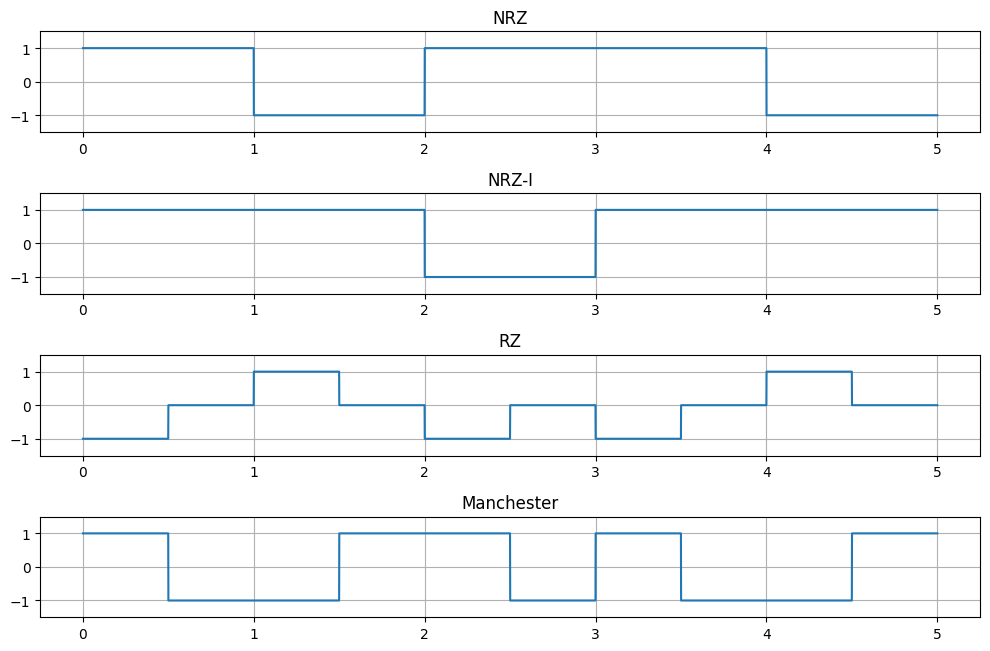

In [15]:
plt.figure(figsize=(10,8))

title = ['NRZ', 'NRZ-I', 'RZ', 'Manchester']
encodes = [nrz, nrz_i, rz, manchester]

for i in range(len(title)):
    plt.subplot(bit_size, 1, i+1)
    plt.title(title[i])
    plt.plot(t, encodes[i])
    plt.xticks(np.linspace(0, bit_size, bit_size+1))
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

plt.tight_layout()
plt.show()


### Practice ---------------------------

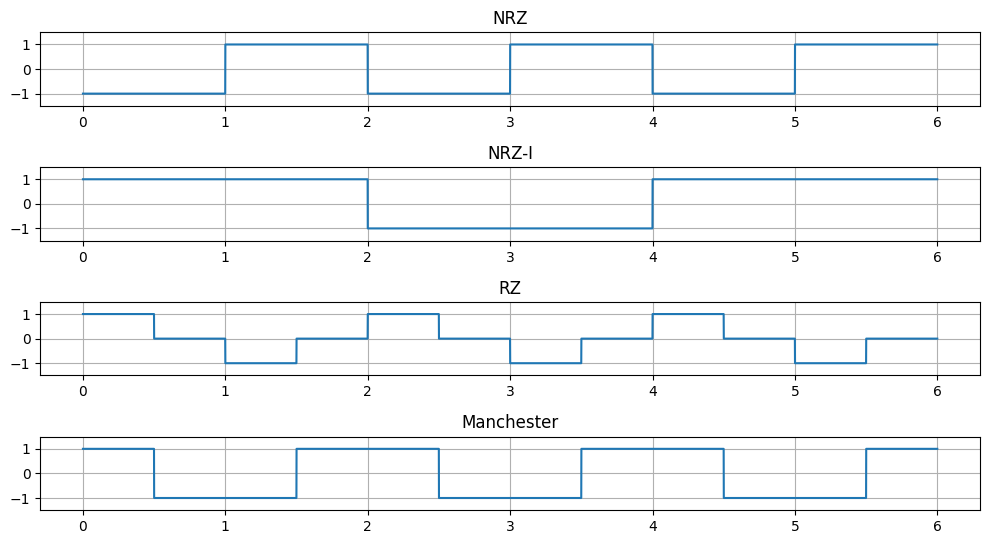

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = '101010'
bits = list(map(int, data))
sz = len(bits)

points = 1000
half = points//2

t = np.linspace(0, len(bits), len(bits) * points)

nrz, nrz_i, rz, mn = [], [], [], []
last_level = -1

for bit in bits:
    if bit:
        nrz.extend([-1] * points)
        last_level *= -1 # Invert on 1

        rz.extend([1] * half + [0] * half)
        mn.extend([1] * half + [-1] * half)
    else:
        nrz.extend([1] * points)
        rz.extend([-1] * half + [0] * half)
        mn.extend([-1] * half + [1] * half)
    
    nrz_i.extend([last_level] * points)

plt.figure(figsize=(10,8))

title = ['NRZ', 'NRZ-I', 'RZ', 'Manchester']
encodes = [nrz, nrz_i, rz, mn]

for i in range(len(title)):
    plt.subplot(sz, 1, i+1)
    plt.title(title[i])
    plt.plot(t, encodes[i])
    plt.xticks(np.linspace(0, sz, sz+1))
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------------------
# 3. Analog Modulation (AM, FM, PM)
# ----------------------------------------

- import modules

In [17]:
import numpy as np
import matplotlib.pyplot as plt

- Parameters

In [18]:
t = np.linspace(0, 1, 1000) # Time (1 sec)
fm, fc = 5, 50 # message frequency, carrier frequency

- ### generate signals
  Signal(FM) = sin(2π * fc ​* t + kf * ​∫ m(t) dt)

In [19]:
msg_signal = np.sin(2*np.pi * fm*t)
carrier_signal = np.sin(2*np.pi * fc*t)

am_signal = (0.5 + msg_signal) * carrier_signal
dt = t[1]-t[0]; kf = 150; kp = 5
fm_signal = np.sin(2*np.pi * fc*t + kf *np.cumsum(msg_signal) * dt)
pm_signal = np.sin(2*np.pi * fc*t + kp * msg_signal)


- Plot

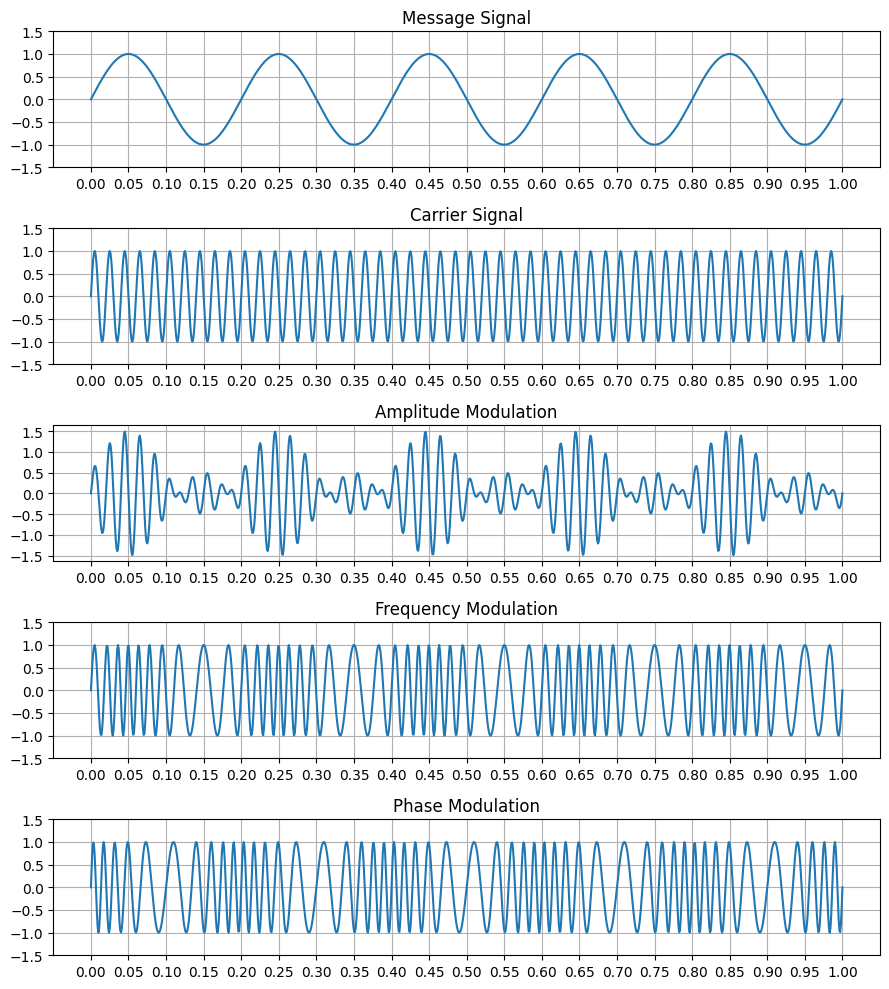

In [20]:
plt.figure(figsize=(9,10))

titles = [
    'Message Signal',
    'Carrier Signal',
    'Amplitude Modulation',
    'Frequency Modulation',
    'Phase Modulation'
]
signals = [msg_signal, carrier_signal, am_signal, fm_signal, pm_signal]

sz = len(signals)
for i in range(sz):
    plt.subplot(sz, 1, i+1)
    plt.title(titles[i])
    plt.plot(t, signals[i])
    plt.xticks(np.linspace(0, 1, fm*4+1))
    plt.yticks(np.linspace(-1.5, 1.5, 7))
    plt.grid(True)

plt.tight_layout()
plt.show()

### Practice -------------------------------------

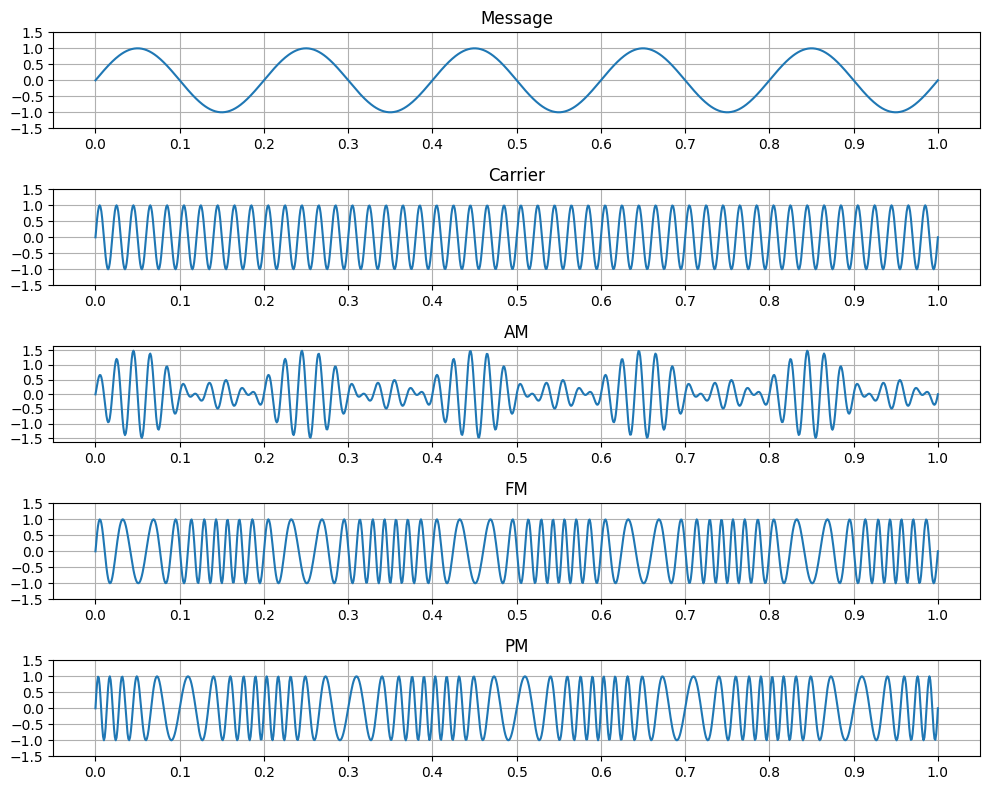

In [21]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000) 
fm, fc = 5, 50

msg_sig = np.sin(2*np.pi*fm*t)
carr_sig = np.sin(2*np.pi*fc*t)

am_sig = (0.5 + msg_sig) * carr_sig

# fm_sig = sin(2π*fc*t + kf * ​∫m(t)dt)
# pm_sig = sin(2π*fc*t + kp * m(t))
kf, kp = 150, 5
dt = t[0] - t[1]
samePart = 2*np.pi*fc*t

fm_sig = np.sin(samePart + kf * np.cumsum(msg_sig) * dt)
pm_sig = np.sin(samePart + kp * msg_sig)

titles = ['Message', 'Carrier', 'AM', 'FM', 'PM']
signals = [msg_sig, carr_sig, am_sig, fm_sig, pm_sig]

sz = len(titles)

plt.figure(figsize=(10,8))
for i in range(sz):
    plt.subplot(sz, 1, i+1)
    plt.title(titles[i])
    plt.plot(t, signals[i])
    plt.xticks(np.linspace(0, 1, fm*2+1))
    plt.yticks(np.linspace(-1.5, 1.5, 7))
    plt.grid(True)

plt.tight_layout()
plt.show()



# -----------------------------------------
# 4. Digital Modulation (ASK, FSK, PSK)
# -----------------------------------------

In [22]:
import numpy as np
import matplotlib.pyplot as plt

- initialize variables

In [23]:
data = '10110100'
bits = list(map(int, data))
sz = len(bits)

t_bit = np.linspace(0, 1, points) # time per bit
t = np.linspace(0, sz, sz*points) # For full signal

f0, f1 = 10, 5 # bit 0 -> f0, bit 1 -> f1
fc = 5 # carrier frequency


ask_sig, fsk_sig, psk_sig = [], [], []
common = 2* np.pi * t_bit


In [24]:

for bit in bits:
    if bit:
        ask_sig.extend(np.sin(common * fc))
        fsk_sig.extend(np.sin(common * f1))
        psk_sig.extend(np.sin(common * fc))
    else:
        ask_sig.extend(np.zeros(points))
        fsk_sig.extend(np.sin(common * f0))
        psk_sig.extend(np.sin(common * fc + np.pi)) # 180° phase shift

- Plot

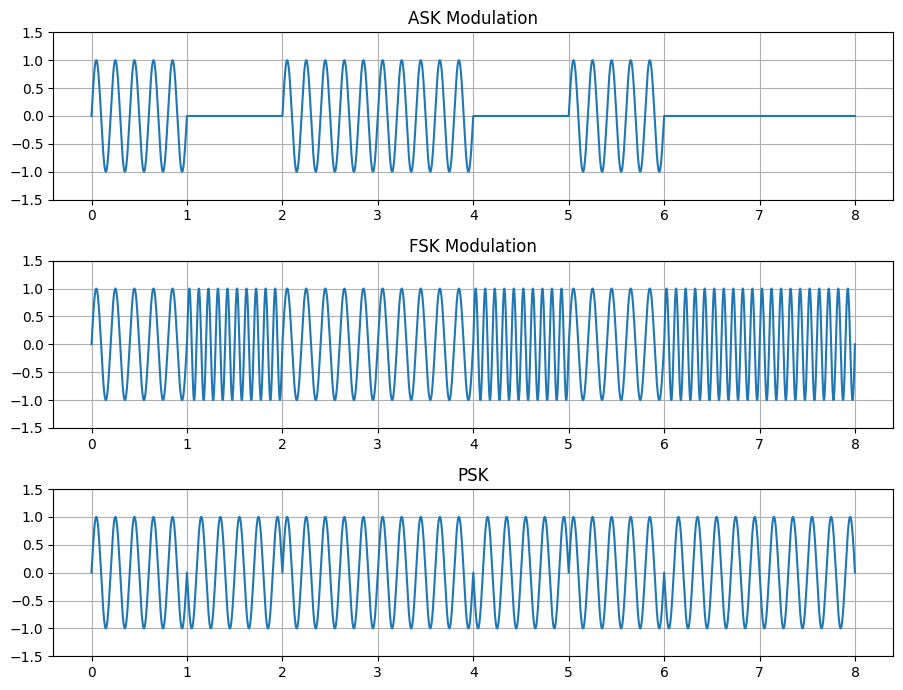

In [25]:
plt.figure(figsize=(9,7))
title = ['ASK Modulation', 'FSK Modulation', 'PSK']
signals = [ask_sig, fsk_sig, psk_sig]

for i in range(len(title)):
    plt.subplot(3, 1, i+1)
    plt.title(title[i])
    plt.plot(t, signals[i])
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Practice ----------------------

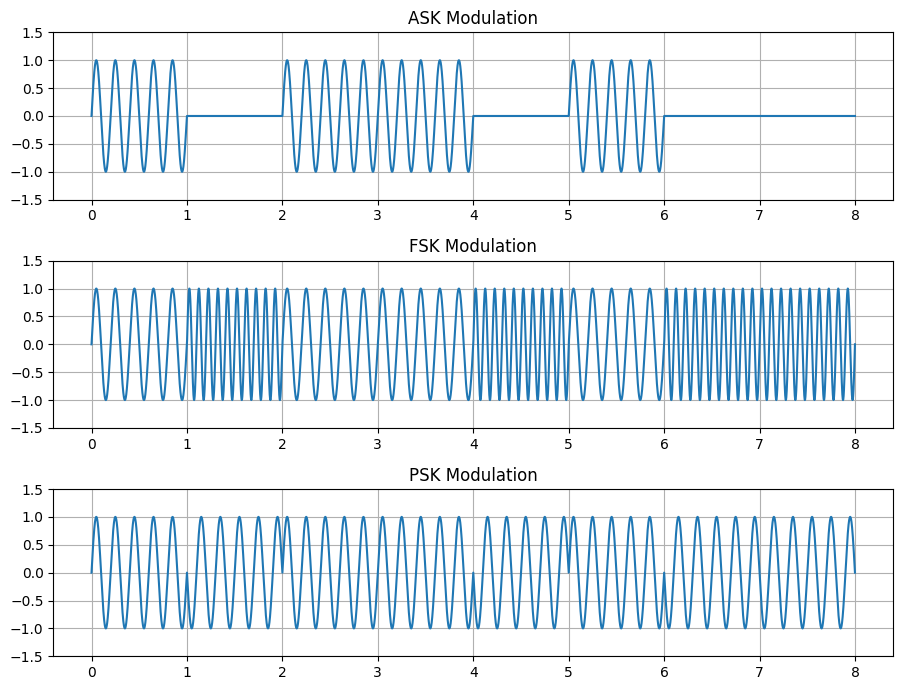

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = '10110100'
bits = list(map(int, data))
sz = len(bits); points = 1000

t_bit = np.linspace(0, 1, points) # time per bit
t = np.linspace(0, sz, sz*points) # For full signal

f0, f1 = 10, 5 # bit 0 -> f0, bit 1 -> f1
fc = 5 # carrier frequency

ask_sig, fsk_sig, psk_sig = [], [], []
common = 2* np.pi * t_bit

for bit in bits:
    if bit:
        ask_sig.extend(np.sin(common * fc))
        fsk_sig.extend(np.sin(common * f1))
        psk_sig.extend(np.sin(common * fc))
    else:
        ask_sig.extend(np.zeros(points))
        fsk_sig.extend(np.sin(common * f0))
        psk_sig.extend(np.sin(common * fc + np.pi)) # 180° phase shift
    
plt.figure(figsize=(9, 7))
title = ['ASK Modulation', 'FSK Modulation', 'PSK Modulation']
signals = [ask_sig, fsk_sig, psk_sig]


for i in range(len(title)):
    plt.subplot(3, 1, i+1)
    plt.title(title[i])
    plt.plot(t, signals[i])
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

plt.tight_layout()
plt.show()